In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/media/newhd/DocumentsB/SEM_6/DS/DataSets/Social_Network_Ads.csv')

<Axes: xlabel='Age'>

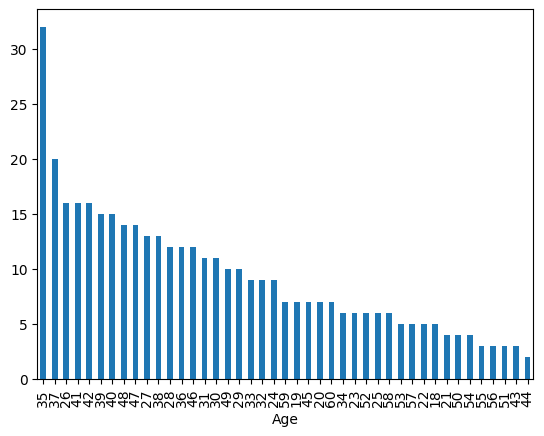

In [3]:

df['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender', ylabel='count'>

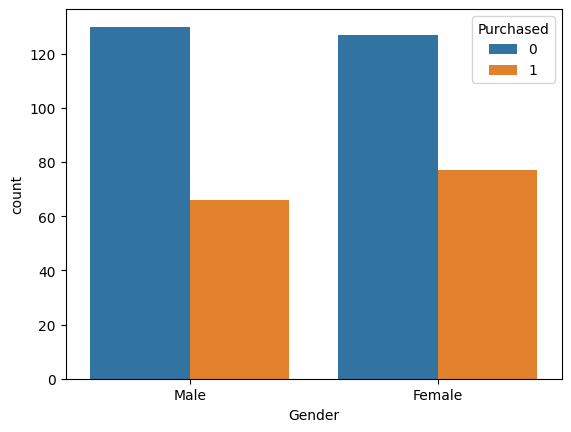

In [7]:
sns.countplot(x=df['Gender'], hue=df['Purchased'])

<Axes: xlabel='Gender', ylabel='count'>

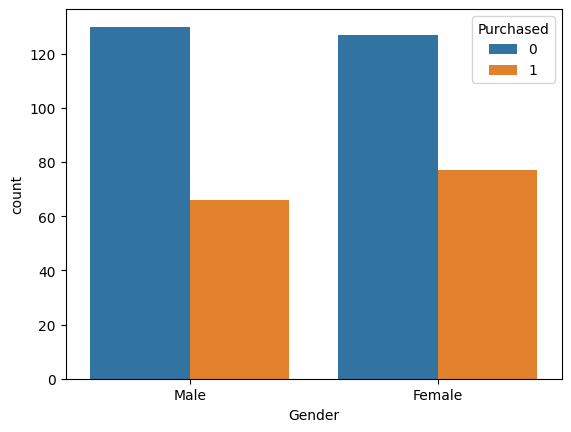

In [9]:
sns.countplot(x=df['Gender'], hue=df['Purchased'])

<Axes: xlabel='Age', ylabel='Count'>

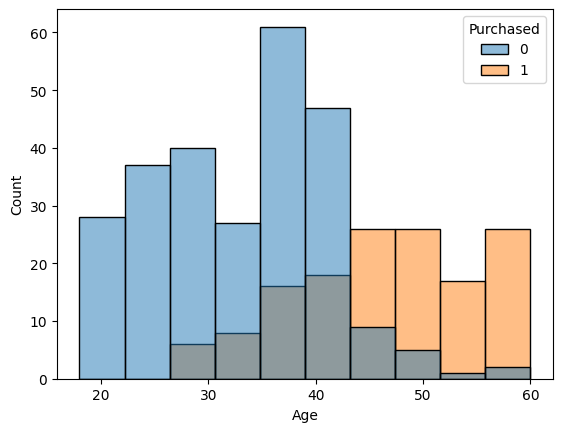

In [10]:
sns.histplot(x=df['Age'], hue=df['Purchased'])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

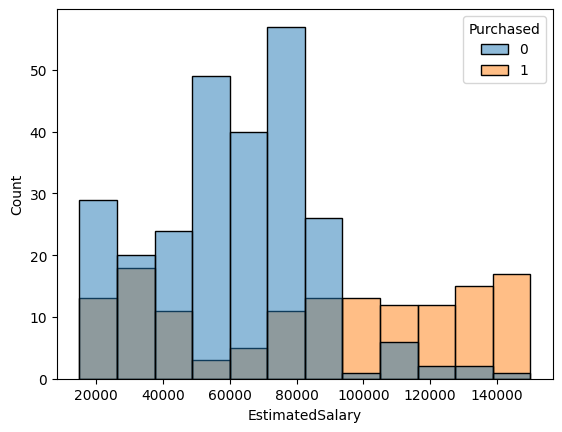

In [12]:
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

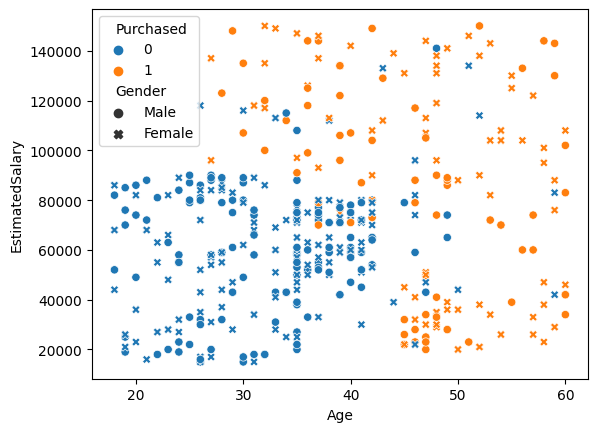

In [13]:
sns.scatterplot(data=df, x="Age", y='EstimatedSalary', hue='Purchased', style='Gender')

<Axes: >

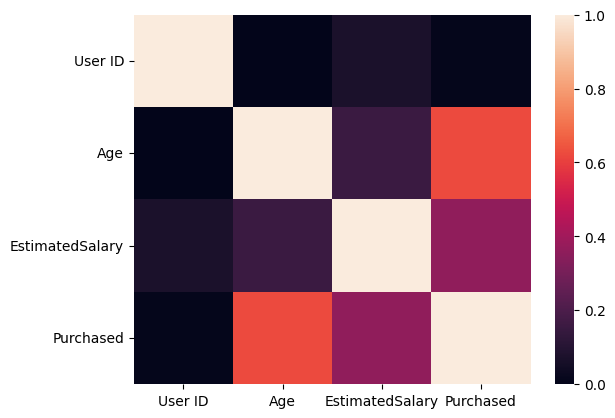

In [23]:
sns.heatmap(df.drop(['Gender'], axis=1).corr())

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lr = LabelEncoder()

In [26]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [28]:
df['Gender'].unique()

array([1, 0])

<Axes: xlabel='Age', ylabel='Count'>

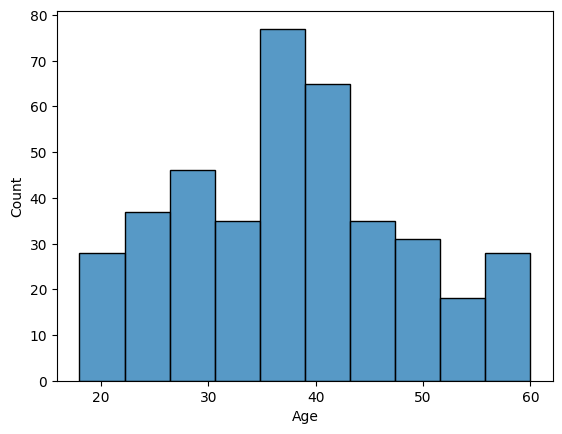

In [29]:
sns.histplot(df['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

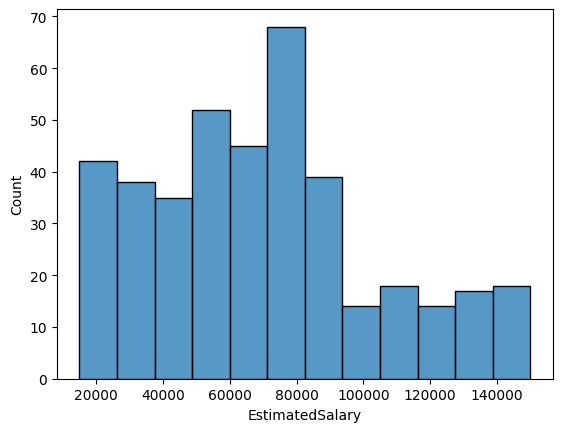

In [30]:
sns.histplot(df['EstimatedSalary'])

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mx = MinMaxScaler()

In [34]:
columns = ['Age', 'EstimatedSalary']

In [36]:
df[columns] = mx.fit_transform(df[columns])

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0


In [38]:


#train test

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.drop(['User ID', 'Purchased'], axis = 1)

In [43]:
x.head()

,Gender,Age,EstimatedSalary
0,1,0.023810,0.029630
1,1,0.404762,0.037037
2,0,0.190476,0.207407
3,0,0.214286,0.311111
4,1,0.023810,0.451852


In [44]:
y = df['Purchased']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [46]:
x_train

,Gender,Age,EstimatedSalary
157,1,0.261905,0.444444
109,0,0.476190,0.481481
17,1,0.642857,0.081481
347,0,0.857143,0.688889
24,1,0.666667,0.059259
...,...,...,...
71,0,0.142857,0.088889
106,0,0.190476,0.148148
270,0,0.595238,0.874074
348,1,0.500000,0.459259


In [47]:
# model Training

In [48]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(x_train, y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(x_test)

In [97]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [98]:
act_vs_pred = {"actual" : y_test, 'predicted': y_pred}
act_vs_pred = pd.DataFrame(act_vs_pred)

In [99]:
act_vs_pred.head()

,actual,predicted
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0


In [101]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [102]:
confusion_matrix(y_test.values, y_pred)

array([[72,  1],
       [18, 29]])

In [103]:
accuracy_score(y_test, y_pred)

0.8416666666666667

In [105]:
precision_score(y_test, y_pred)

0.9666666666666667

In [106]:
recall_score(y_test, y_pred)

0.6170212765957447

In [108]:
error_rate = 1- accuracy_score(y_test, y_pred)

In [109]:
error_rate

0.15833333333333333